__Câu 2. Thống kê – Xác suất (6 điểm)__ 
<br> Tập tin IQ.xls chứa những mẫu dữ liệu được thu thập về mối quan hệ giữa chỉ số IQ và điểm thi môn Toán (diemToan) của sinh viên. Người ta muốn biết liệu rằng điểm thi môn Toán có thể được sử dụng để dự đoán chỉ số IQ của sinh viên hay không. 

__2.1) Đọc và xem thông tin của dữ liệu.__

In [1]:
import pandas as pd

In [8]:
data = pd.read_excel('IQ.xls',index_col = 0)
data.head()

,diemToan,IQ
stt,,
1,2.0,68
2,8.4,137
3,7.6,135
4,3.0,79
5,4.4,107


In [3]:
data.shape

(20, 3)

__2.2) Vẽ biểu đồ phân phối tần suất của diemToan. Nhận xét kết quả.__

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
diemToan = data['diemToan']

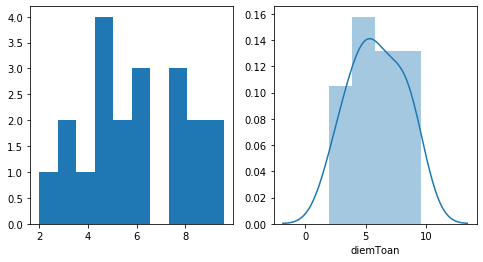

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(diemToan)
plt.subplot(1,2,2)
sns.distplot(diemToan)
plt.show()

__NHẬN XÉT__
<br> diemToan có phân phối chuẩn

__2.3) Thực hiện các thống kê cơ bản cho diemToan và IQ (mean, median, mode, max, min, range).__

In [38]:
import numpy as np
from scipy import stats

In [39]:
## Thống kê cho diemToan:
print('Thong ke diemToan:')
print(' - Mean: ', diemToan.mean())
print(' - Median: ', diemToan.median())
print(' - Mode:', stats.mode(diemToan)[0][0])
print(' - Max: ', diemToan.max())
print(' - Min: ', diemToan.min())
print(' - Range: ', np.ptp(diemToan))

Thong ke diemToan:
 - Mean:  5.919999999999999
 - Median:  5.8
 - Mode: 4.4
 - Max:  9.6
 - Min:  2.0
 - Range:  7.6


C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
## Thống kê cho IQ:
IQ = data['IQ']
print('Thong ke IQ:')
print(' - Mean: ', IQ.mean())
print(' - Median: ', IQ.median())
print(' - Mode:', stats.mode(IQ)[0][0])
print(' - Max: ', IQ.max())
print(' - Min: ', IQ.min())
print(' - Range: ', np.ptp(IQ))

Thong ke IQ:
 - Mean:  115.2
 - Median:  120.0
 - Mode: 110
 - Max:  140
 - Min:  68
 - Range:  72


C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


__2.4) Cho biết các giá trị ở phân vị thứ 20, 35, 65 và 90 của IQ. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.__

In [43]:
percentiles = np.array([20,35,65,90])
x = np.percentile(IQ,percentiles)
x

array([103.2 , 111.95, 128.  , 138.1 ])

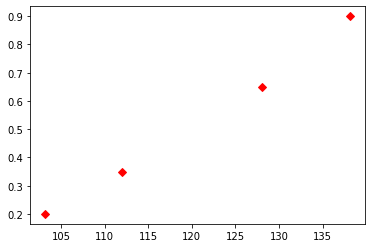

In [44]:
plt.plot(x, percentiles/100, marker='D', color='red',linestyle='none')
plt.show()

__2.5) Vẽ boxplot cho diemToan và cho IQ.__

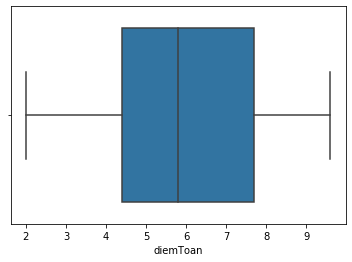

In [45]:
# boxplot of diemToan
sns.boxplot(diemToan)

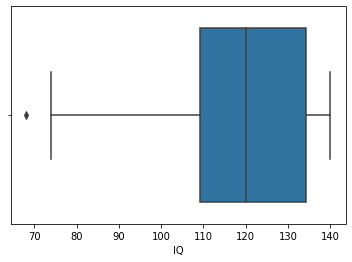

In [46]:
# boxplot of IQ
sns.boxplot(IQ)

__2.6) diemToan có outlier(s) hay không ? IQ có outlier(s) hay không ?__

__NHẬN XÉT__
<br> Theo boxplot ở trên thì diemToan dường như không có ouliers và IQ thì có 1.
<br> Dùng z-score để kiểm tra lại (5% giá trị nhỏ nhất và lớn nhất)

In [47]:
#Using z-score to define outliers diemToan
diemToan_z_score = stats.zscore(diemToan)
outliers = diemToan_z_score[[(n <= -2.5)|(n >= 2.5) for n in diemToan_z_score]]
indexes = [diemToan_z_score.tolist().index(i) for i in outliers]

print('Indexs of outliers:', indexes)
print('Outliers value:', diemToan[indexes])

Indexs of outliers: []
Outliers value: Series([], Name: diemToan, dtype: float64)


In [48]:
#Using z-score to define outliers IQ
IQ_z_score = stats.zscore(IQ)
outliers = IQ_z_score[[(n <= -2.5)|(n >= 2.5) for n in IQ_z_score]]
indexes = [IQ_z_score.tolist().index(i) for i in outliers]

print('Indexs of outliers:', indexes)
print('Outliers value:', IQ[indexes])

Indexs of outliers: []
Outliers value: Series([], Name: IQ, dtype: int64)


__NHẬN XÉT__
<br> Theo kiểm tra z-score thì diemToan va IQ không có ouliers

__2.7) Tìm phương sai (variance) của diemToan.__

In [49]:
var_diemToan = np.var(diemToan)
var_diemToan

4.6576

__2.8) Tìm độ lệch chuẩn (standard deviation) của IQ.__

In [50]:
std_IQ = np.std(IQ)
std_IQ

21.715432300555292

__2.9) Tìm độ xiên (skewness) của diemToan. Nhận xét kết quả.__

In [51]:
## Skewness
skew_diemToan = stats.skew(diemToan)
skew_diemToan
#skew > 0 => lech phai

-0.026588704770725533

__NHẬN XÉT__
<br> skew < 0 => phân phối của diemToan lệch trái

__2.10) Tìm độ nhọn (kurtosis) của diemToan. Nhận xét kết quả.__

In [52]:
## Kurtosis
kur_diemToan = stats.kurtosis(diemToan)
kur_diemToan

-1.0561729334035566

In [53]:
kur_diemToan = stats.kurtosis(diemToan, fisher = False)
kur_diemToan

1.9438270665964434

__NHẬN XÉT__
<br> Với độ nhọn Kurtosis càng nhỏ hơn 0 (hay độ nhọn Pearson càng nhỏ hơn 3) thì phân bố này ít nhọn hơn phân phối chuẩn

__2.11) Cho biết số lượng mẫu có giá trị IQ > 130. Xác suất các mẫu có IQ lớn hơn 130 là bao nhiêu ?__

In [56]:
p_x_130 = np.extract(IQ>130,IQ).size/IQ.size
p_x_130

0.3

Điều này có nghĩa là dự trên dữ liệu chúng ta có 30% mẫu có IQ trên 130

__2.12) Tìm xác suất của P(85 ≤ IQ ≤ 130).__

In [59]:
p_x_85 = np.extract(IQ>=85,IQ).size/IQ.size
p_x_130 = np.extract(IQ<130,IQ).size/IQ.size
p_x_85_130 = p_x_85 - p_x_130
p_x_85_130

0.15000000000000002

__2.13) Vẽ biểu đồ thể hiện mối quan hệ giữa diemToan và IQ. Nhận xét kết quả.__

<Figure size 432x432 with 0 Axes>

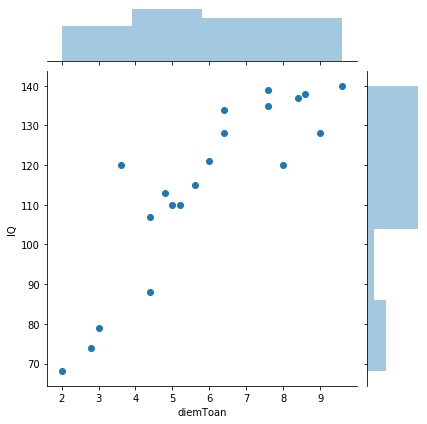

In [61]:
plt.figure(figsize=(6,6))
sns.jointplot(x='diemToan', y='IQ', data = data)
plt.show()

__NHẬN XÉT__
<br> diemToan va IQ dường như có mối tương quan dương

__2.14) Tính giá trị tương quan giữa diemToan và IQ.__

In [76]:
from numpy import array, cov, corrcoef
 
cov = cov(diemToan,IQ)
cov

array([[  4.90273684,  43.03789474],
       [ 43.03789474, 496.37894737]])

In [78]:
corr = corrcoef(diemToan,IQ)
corr

array([[1.        , 0.87241887],
       [0.87241887, 1.        ]])

__2.15) Dựa vào thể hiện dữ liệu trực quan và giá trị tương quan ở trên, hãy cho biết có thể dựa trên diemToan để dự đoán giá trị của IQ hay không ? Giải thích nguyên nhân. __

__NHẬN XÉT__
<br> Covariance và corrcoef dương phản ánh diemToan và IQ có mối quan hệ thuận. Có thể dùng diemToan dể dự đoán IQ

__2.16) Giả sử có thể dựa trên diemToan để dự đoán giá trị của chỉ số IQ. Xây dựng hệ phương trình y = mx + b (với y là IQ và x là diemToan).__

In [63]:
# Hàm tính m (slope), b (theta/bias):    y = mx + b
def gradient_descent_2(alpha, x, y, numIterations):
    M     = x.shape[0] # number of samples
    theta = np.ones(2)
    x_T   = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss       = hypothesis - y
        J          = np.sum(loss ** 2) / (2 * M)  # cost
#         print("iter %s | J: %.3f" % (iter, J))      
        gradient   = np.dot(x_T, loss) / M      
        
        theta    = theta - (alpha * gradient)  # update
    return theta

In [65]:
# y = mx + b (với x là diemToan, y là IQ)
m = diemToan.size
X = np.c_[np.ones(m), diemToan] #insert column
y = IQ
alpha = 0.01 # Learning rate
theta = gradient_descent_2(alpha, X, y, 1000)

__2.17) Tìm m và b.__

In [68]:
print('Hàm tuyến tính giữa diemToan và IQ là: y = %fx + %f' % (theta[1], theta[0]))

Hàm tuyến tính giữa diemToan và IQ là: y = 11.611848x + 44.283502


__2.18) Từ m và b, hãy tính toán lại các chỉ số IQ trong mẫu dữ liệu. Trực quan hóa dữ liệu.__

In [69]:
for i in range(X.shape[1]):
    IQ_predict = theta[1]* X + theta[0]

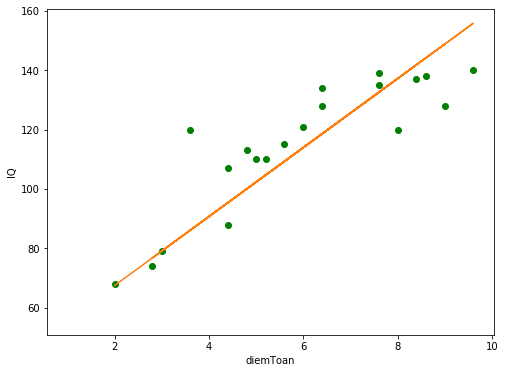

In [71]:
plt.figure(figsize=(8,6))
# plt.xlim(1.6,2.2)
# plt.ylim(60,150)
plt.scatter(X[:,1], IQ, color='green')
plt.plot(X, IQ_predict)
plt.xlabel('diemToan')
plt.ylabel('IQ')
plt.show()

__2.19) Tính các giá trị IQ tương ứng với diemToan lần lượt là 2.0, 5.0, 8.0, 9.5. __

In [72]:
diemToan_new = np.array([2,5,8,9.5])
IQ_new = theta[1]*diemToan_new + theta[0]
IQ_new

array([ 67.5071982 , 102.34274196, 137.17828572, 154.5960576 ])